In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

import activityanalysis_test as act
import respy_test as respy

In [2]:
# conditions for comparison 246900 289766
units = 1000 # ms
fs = 50/units # 10 Hz

cutoff = np.array([0.5])/units # filtering to between 1 and 0.05 hz
nyq = 1 * fs 
order = 2 
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)

In [3]:
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/')
trial_wise = pd.read_csv('trial_wise.csv')
trial_seq = pd.read_csv('Trial_Stim.csv')
trial_times=trial_seq.iloc[:,:2].copy()

trial_times['Time (ms)'] = units*trial_times['Time (s)']
trial_times=trial_times.set_index("Time (ms)", drop=True)
trial_times

,Time (s),Element
Time (ms),,
0.0,0.000,Trial number
2136.0,2.136,Part 1 Synchronisation
20000.0,20.000,taps
23450.0,23.450,Part 2 Listening task 1
32000.0,32.000,Silence 1
62000.0,62.000,Music 1
92500.0,92.500,Part 3 Moving tasks
101000.0,101.000,Verbalise
112000.0,112.000,Move


In [4]:
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/AppData_assessment/eirik_data/2021_09_21-11_16_54/')
os.listdir()

['2021_09_21-11_16_54_Summary.dat',
 '2021_09_21-11_16_54_Event_Data_1.csv',
 '2021_09_21-11_16_54_SessionInfo.txt',
 '2021_09_21-11_16_54_Breathing.dat',
 '2021_09_21-11_16_54_ECG.csv',
 '2021_09_21-11_16_54_Accel.dat',
 '2021_09_21-11_16_54_BB.csv',
 '2021_09_21-11_16_54_RR.hed',
 '2021_09_21-11_16_54_Accel.hed',
 '2021_09_21-11_16_54_RR.dat',
 '2021_09_21-11_16_54_Breathing.hed',
 '2021_09_21-11_16_54_Summary.hed',
 '2021_09_21-11_16_54_ECG.hed',
 '2021_09_21-11_16_54_BB.hed',
 '2021_09_21-11_16_54_RR.csv',
 '2021_09_21-11_16_54_Accel.csv',
 '2021_09_21-11_16_54_BB.dat',
 '2021_09_21-11_16_54_ECG.dat',
 '2021_09_21-11_16_54_Breathing.csv',
 '2021_09_21-11_16_54_Summary.csv']

In [5]:
resp_init = pd.read_csv('2021_09_21-11_16_54_Breathing.csv')
resp_init["Time"] = pd.to_datetime(resp_init["Time"])
resp_init =resp_init.set_index("Time")

df_resp = resp_init.iloc[2000:49800,:]

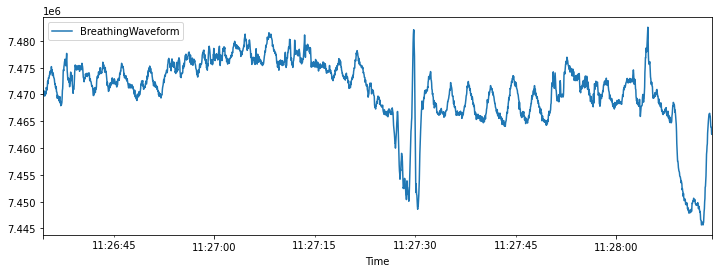

In [6]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(111)
df_resp = resp_init.iloc[14500:17000,:] # 3000:48700
df_resp.plot.line(ax = ax)
plt.show()

In [ ]:
#t_range = np.array([-20,300])*units
fig = plt.figure(figsize=(12,4))
dims = ['belt']
for i in range(len(dims)):
    d = dims[i]
    ax = plt.subplot(211 + i)
    df_rs.plot.line(y=d,ax=ax)
    df_rs.plot.line(y='filt ' + d,ax=ax)
    plt.ylim(-100,300)
    if i == 0: plt.title(trial_name + ' respiration belt measurements')
    plt.xticks(trial_times.index,trial_times["Time (s)"])#, concert_times['event'])
    plt.grid()
    plt.xlim(t_range)
    
ax = plt.subplot(212)
for d in dims:
    df_rs.plot.line(y='diff ' + d,ax=ax)
    plt.ylim(-40,40)
    plt.xticks(trial_times.index,trial_times.Element, rotation='vertical')#, concert_times['event'])
    plt.grid()
    plt.xlim(t_range)
    
plt.savefig('filtered_Resp.png',dpi = 300)
plt.show()